In [1]:
import torch
from NLPUtils import *

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [1]:
with open('text8','r') as file:
    corpus = file.read()
    corpus = [corpus.split(' ')]
    corpus = [corpus[0][:100]]

In [4]:
# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 100
cutoff_freq = 0
pretrained_layer = None

# Parámetros de iteración:
batch_size = 128
epochs = 100
learning_rate = 9e-1
sample_loss_every = 100
use_gpu = 1

embedding_layer, vocab, loss_history = SGDTrainWordVectors(corpus,cutoff_freq=cutoff_freq,pretrained_layer=pretrained_layer,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu,epochs=epochs,learning_rate=learning_rate,sample_loss_every=sample_loss_every)

Starting training...
	Model used: SkipGram
    	Optimization method: Stochastic Gradient Descent
    	Learning Rate: 0.9
    	Number of epochs: 100
    	Number of batches: 1
    	Number of samples per batch: 128

Epoch: 1, Batch number: 0, Loss: 4.434978485107422
Training finished



In [20]:
corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 5
cutoff_freq = 0
pretrained = None

# Parámetros de iteración:
batch_size = 4
epochs = 100
learning_rate = 9e-1
sample_loss_every = 1
use_gpu = 1

trainer = WordVectorsSGD(data=corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)

print(trainer.model)
print(trainer.dataloader.dataset.vocabulary)
print(trainer.dataloader.dataset.data)
try:
    print(trainer.optimizer)
except AttributeError:
    print('No hay optimizer definido aún')
print([param for param in trainer.model.parameters()])

SkipGramModel(
  (emb): Embedding(10, 5, padding_idx=9)
  (out): Linear(in_features=5, out_features=9, bias=False)
)
<Vocabulary(size=9)>
      word                    context
0     hola   [<NT>, <NT>, soy, lauti]
1      soy  [<NT>, hola, lauti, <NT>]
2    lauti    [hola, soy, <NT>, <NT>]
3     hola   [<NT>, <NT>, soy, guadi]
4      soy  [<NT>, hola, guadi, <NT>]
5    guadi    [hola, soy, <NT>, <NT>]
6     chau    [<NT>, <NT>, soy, luna]
7      soy     [<NT>, chau, luna, me]
8     luna    [chau, soy, me, quiero]
9       me    [soy, luna, quiero, ir]
10  quiero       [luna, me, ir, <NT>]
11      ir   [me, quiero, <NT>, <NT>]
No hay optimizer definido aún
[Parameter containing:
tensor([[-1.5731,  1.2761,  0.7741, -0.6832, -2.5529],
        [ 0.0503,  2.3127, -1.2406,  0.0915,  0.8841],
        [ 0.8264, -0.7821, -0.0966, -0.1817, -1.7224],
        [ 0.5607,  1.0084, -0.4992,  0.2888, -0.1928],
        [ 0.6871,  0.1383, -1.1615, -0.3437, -1.5282],
        [ 0.9642,  0.3541,  0.0673,  1.6

In [19]:
w = torch.tensor([[-0.8808,  0.9813, -0.0913, -0.7736, -1.6401],
              [ 1.3218, -0.0227,  1.9754,  0.0661,  1.4249],
              [ 0.8959,  2.2131,  0.8981,  2.0037,  0.0103],
              [-0.2885, -1.5594,  0.3661, -0.8757, -1.6371],
              [-1.7829, -0.8683, -0.9614,  0.8618,  1.0741],
              [ 0.3797,  1.2114,  0.9492,  0.0443, -0.2893],
              [-0.2546,  0.6020, -1.2442, -1.9075,  0.2112],
              [ 0.6758,  1.6054,  0.2082,  1.5314,  0.7991],
              [ 1.3780, -0.2357, -0.8184, -0.7739,  0.0783],
              [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],dtype=torch.float32)

corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 5
cutoff_freq = 0
pretrained = w

# Parámetros de iteración:
batch_size = 4
epochs = 100
learning_rate = 9e-1
sample_loss_every = 1
use_gpu = 1

trainer = WordVectorsSGD(data=corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer.init_embeddings(pretrained,True)

print(trainer.model)
print(trainer.dataloader.dataset.vocabulary)
print(trainer.dataloader.dataset.data)
try:
    print(trainer.optimizer)
except AttributeError:
    print('No hay optimizer definido aún')
print(trainer.model.emb.weight.requires_grad)

SkipGramModel(
  (emb): Embedding(10, 5, padding_idx=9)
  (out): Linear(in_features=5, out_features=9, bias=False)
)
<Vocabulary(size=9)>
      word                    context
0     hola   [<NT>, <NT>, soy, lauti]
1      soy  [<NT>, hola, lauti, <NT>]
2    lauti    [hola, soy, <NT>, <NT>]
3     hola   [<NT>, <NT>, soy, guadi]
4      soy  [<NT>, hola, guadi, <NT>]
5    guadi    [hola, soy, <NT>, <NT>]
6     chau    [<NT>, <NT>, soy, luna]
7      soy     [<NT>, chau, luna, me]
8     luna    [chau, soy, me, quiero]
9       me    [soy, luna, quiero, ir]
10  quiero       [luna, me, ir, <NT>]
11      ir   [me, quiero, <NT>, <NT>]
No hay optimizer definido aún
True


In [29]:
corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 5
cutoff_freq = 0
pretrained = w

# Parámetros de iteración:
batch_size = 4
use_gpu = 1

trainer = WordVectorsSGD(data=corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer.init_embeddings()

Parameter containing:
tensor([[ 1.7583,  0.8738, -0.6171, -0.1557, -1.2599],
        [-0.5169, -0.7616, -0.2082, -0.3149,  1.5013],
        [-0.9511, -0.1477, -1.7064,  0.7094,  0.8422],
        [ 0.8737, -2.0430,  1.6581, -0.1308,  1.2035],
        [-1.1696, -2.1605, -2.9479, -1.9639, -1.8749],
        [-0.3252,  1.0388, -0.0582, -0.0877,  1.2651],
        [-0.4380,  0.5571, -2.0759, -0.1515,  0.2757],
        [ 0.2998, -0.5045,  1.1698,  0.6967, -1.1217],
        [-0.3135, -0.5227,  1.4989, -1.0737,  0.3881],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:1',
       requires_grad=True)
Parameter containing:
tensor([[ 0.2460,  0.0812,  0.1651, -0.0219, -0.2537],
        [-0.2358, -0.0377,  0.4048,  0.2584, -0.0899],
        [-0.3095,  0.1891,  0.0991,  0.3242, -0.0352],
        [ 0.2186,  0.3277,  0.4352,  0.1303,  0.4309],
        [-0.1255, -0.2640,  0.3848, -0.2928, -0.2305],
        [ 0.1306,  0.2802,  0.2916, -0.0166, -0.1871],
        [-0.2466, -0.3977, -0.2

In [30]:
epochs = 50
learning_rate = 9e-1
sample_loss_every = 1

trainer.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Epoch: 1, Batch number: 0, Loss: 2.560940742492676
Epoch: 1, Batch number: 1, Loss: 2.3271074295043945
Epoch: 1, Batch number: 2, Loss: 2.657684087753296
Epoch: 2, Batch number: 0, Loss: 2.1578352451324463
Epoch: 2, Batch number: 1, Loss: 1.9825663566589355
Epoch: 2, Batch number: 2, Loss: 2.1332740783691406
Epoch: 3, Batch number: 0, Loss: 1.917802333831787
Epoch: 3, Batch number: 1, Loss: 1.955141544342041
Epoch: 3, Batch number: 2, Loss: 2.075002670288086
Epoch: 4, Batch number: 0, Loss: 1.6177619695663452
Epoch: 4, Batch number: 1, Loss: 2.1470327377319336
Epoch: 4, Batch number: 2, Loss: 1.9980913400650024
Epoch: 5, Batch number: 0, Loss: 1.9602043628692627
Epoch: 5, Batch number: 1, Loss: 2.022777557373047
Epoch: 5, Batch number: 2, Loss: 1.5432642698287964
Epoch: 6, Batch number: 0, Loss: 1.8362587690353394
Epoch: 6, Batch number: 1, Loss: 1.840341567993164
Epoch: 6, Batch number: 2, Loss: 1.8807966709136963
Epoch: 7, Batch number: 0, Loss: 1.853543519973754

<IPython.core.display.Javascript object>


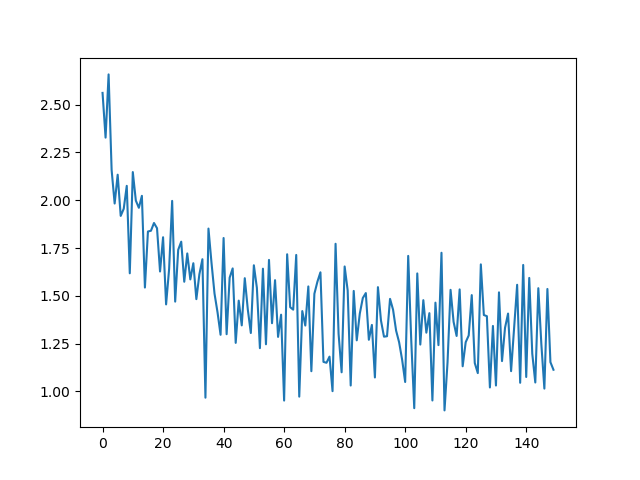

In [31]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [32]:
epochs = 50
learning_rate = 1e-2
sample_loss_every = 1

trainer.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Epoch: 1, Batch number: 0, Loss: 1.1724739074707031
Epoch: 1, Batch number: 1, Loss: 0.9495099186897278
Epoch: 1, Batch number: 2, Loss: 1.6189792156219482
Epoch: 2, Batch number: 0, Loss: 1.2609291076660156
Epoch: 2, Batch number: 1, Loss: 1.4357433319091797
Epoch: 2, Batch number: 2, Loss: 1.1102147102355957
Epoch: 3, Batch number: 0, Loss: 1.2460726499557495
Epoch: 3, Batch number: 1, Loss: 1.2552794218063354
Epoch: 3, Batch number: 2, Loss: 1.2961914539337158
Epoch: 4, Batch number: 0, Loss: 1.2632092237472534
Epoch: 4, Batch number: 1, Loss: 1.4127600193023682
Epoch: 4, Batch number: 2, Loss: 1.1222420930862427
Epoch: 5, Batch number: 0, Loss: 1.3938403129577637
Epoch: 5, Batch number: 1, Loss: 1.109643578529358
Epoch: 5, Batch number: 2, Loss: 1.270317792892456
Epoch: 6, Batch number: 0, Loss: 1.268007755279541
Epoch: 6, Batch number: 1, Loss: 1.6392260789871216
Epoch: 6, Batch number: 2, Loss: 0.8335739970207214
Epoch: 7, Batch number: 0, Loss: 1.23484206199

<IPython.core.display.Javascript object>


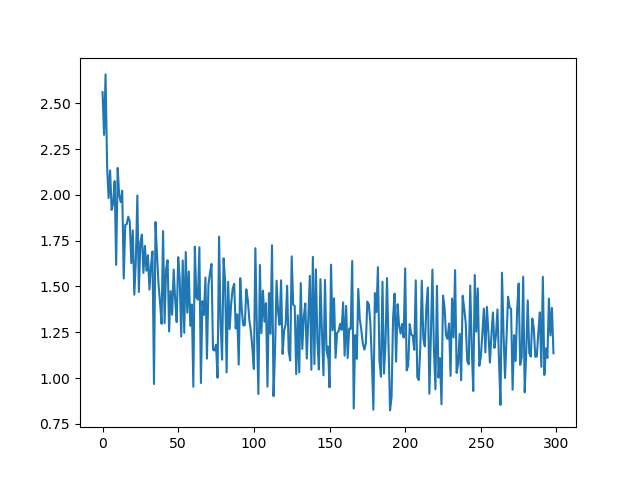

In [33]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [26]:
corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 5
cutoff_freq = 0
pretrained = None

# Parámetros de iteración:
batch_size = 4
use_gpu = 1

trainer = WordVectorsSGD(data=corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer.init_embeddings()

In [27]:
epochs = 100
learning_rate = 1e-2
sample_loss_every = 1

trainer.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Epoch: 1, Batch number: 0, Loss: 2.220339775085449
Epoch: 1, Batch number: 1, Loss: 2.4715218544006348
Epoch: 1, Batch number: 2, Loss: 2.312255382537842
Epoch: 2, Batch number: 0, Loss: 2.224777936935425
Epoch: 2, Batch number: 1, Loss: 2.4044649600982666
Epoch: 2, Batch number: 2, Loss: 2.3144748210906982
Epoch: 3, Batch number: 0, Loss: 2.2113656997680664
Epoch: 3, Batch number: 1, Loss: 2.5082788467407227
Epoch: 3, Batch number: 2, Loss: 2.257596254348755
Epoch: 4, Batch number: 0, Loss: 2.3318490982055664
Epoch: 4, Batch number: 1, Loss: 2.382678747177124
Epoch: 4, Batch number: 2, Loss: 2.2069671154022217
Epoch: 5, Batch number: 0, Loss: 2.328563928604126
Epoch: 5, Batch number: 1, Loss: 2.428248882293701
Epoch: 5, Batch number: 2, Loss: 2.153139352798462
Epoch: 6, Batch number: 0, Loss: 2.3433597087860107
Epoch: 6, Batch number: 1, Loss: 2.2968993186950684
Epoch: 6, Batch number: 2, Loss: 2.2360928058624268
Epoch: 7, Batch number: 0, Loss: 2.161226511001587


Epoch: 72, Batch number: 2, Loss: 2.0243570804595947
Epoch: 73, Batch number: 0, Loss: 1.897979736328125
Epoch: 73, Batch number: 1, Loss: 2.0955255031585693
Epoch: 73, Batch number: 2, Loss: 2.1294233798980713
Epoch: 74, Batch number: 0, Loss: 2.067668914794922
Epoch: 74, Batch number: 1, Loss: 2.0442299842834473
Epoch: 74, Batch number: 2, Loss: 2.0032503604888916
Epoch: 75, Batch number: 0, Loss: 1.9876110553741455
Epoch: 75, Batch number: 1, Loss: 2.0559921264648438
Epoch: 75, Batch number: 2, Loss: 2.0886216163635254
Epoch: 76, Batch number: 0, Loss: 2.0583505630493164
Epoch: 76, Batch number: 1, Loss: 2.022578716278076
Epoch: 76, Batch number: 2, Loss: 2.01113224029541
Epoch: 77, Batch number: 0, Loss: 2.095081090927124
Epoch: 77, Batch number: 1, Loss: 2.0209884643554688
Epoch: 77, Batch number: 2, Loss: 1.9919579029083252
Epoch: 78, Batch number: 0, Loss: 2.0628702640533447
Epoch: 78, Batch number: 1, Loss: 1.9848495721817017
Epoch: 78, Batch number: 2, Loss: 2.0376908779144287

<IPython.core.display.Javascript object>


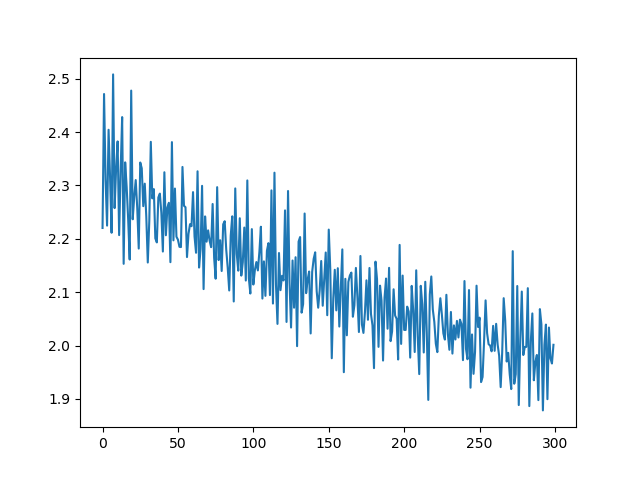

In [28]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [29]:
epochs = 100
learning_rate = 5e-1
sample_loss_every = 1

trainer.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Epoch: 1, Batch number: 0, Loss: 1.9876728057861328
Epoch: 1, Batch number: 1, Loss: 1.9195220470428467
Epoch: 1, Batch number: 2, Loss: 2.0855064392089844
Epoch: 2, Batch number: 0, Loss: 1.9190248250961304
Epoch: 2, Batch number: 1, Loss: 1.8232543468475342
Epoch: 2, Batch number: 2, Loss: 2.0708186626434326
Epoch: 3, Batch number: 0, Loss: 1.8541823625564575
Epoch: 3, Batch number: 1, Loss: 1.908831000328064
Epoch: 3, Batch number: 2, Loss: 1.7982949018478394
Epoch: 4, Batch number: 0, Loss: 1.5949593782424927
Epoch: 4, Batch number: 1, Loss: 1.8515956401824951
Epoch: 4, Batch number: 2, Loss: 1.906602382659912
Epoch: 5, Batch number: 0, Loss: 1.7457035779953003
Epoch: 5, Batch number: 1, Loss: 1.549715280532837
Epoch: 5, Batch number: 2, Loss: 1.8930233716964722
Epoch: 6, Batch number: 0, Loss: 1.870749592781067
Epoch: 6, Batch number: 1, Loss: 1.5383896827697754
Epoch: 6, Batch number: 2, Loss: 1.6027146577835083
Epoch: 7, Batch number: 0, Loss: 1.702788114547

Epoch: 71, Batch number: 0, Loss: 1.2264564037322998
Epoch: 71, Batch number: 1, Loss: 1.1804016828536987
Epoch: 71, Batch number: 2, Loss: 1.39138925075531
Epoch: 72, Batch number: 0, Loss: 1.3513457775115967
Epoch: 72, Batch number: 1, Loss: 1.4655557870864868
Epoch: 72, Batch number: 2, Loss: 1.000361680984497
Epoch: 73, Batch number: 0, Loss: 1.3068288564682007
Epoch: 73, Batch number: 1, Loss: 1.038783073425293
Epoch: 73, Batch number: 2, Loss: 1.4133461713790894
Epoch: 74, Batch number: 0, Loss: 1.437150239944458
Epoch: 74, Batch number: 1, Loss: 1.332656741142273
Epoch: 74, Batch number: 2, Loss: 0.8960844874382019
Epoch: 75, Batch number: 0, Loss: 1.1334812641143799
Epoch: 75, Batch number: 1, Loss: 1.4019733667373657
Epoch: 75, Batch number: 2, Loss: 1.3115392923355103
Epoch: 76, Batch number: 0, Loss: 1.375032901763916
Epoch: 76, Batch number: 1, Loss: 1.16743004322052
Epoch: 76, Batch number: 2, Loss: 1.2815322875976562
Epoch: 77, Batch number: 0, Loss: 0.9867199063301086
Ep

<IPython.core.display.Javascript object>


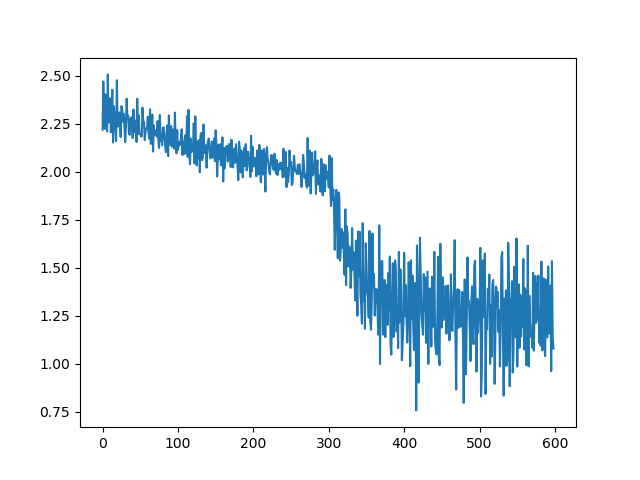

In [30]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])